<a href="https://colab.research.google.com/github/saks0106/Time-Series/blob/main/Time_Series_(Prices_AR_Model)_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the relevant packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing

In [ ]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

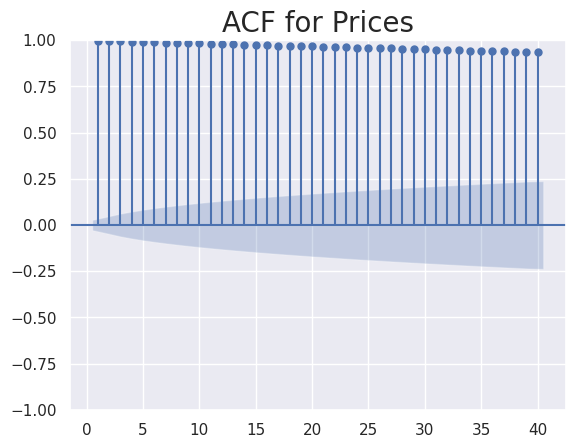

In [ ]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## The PACF

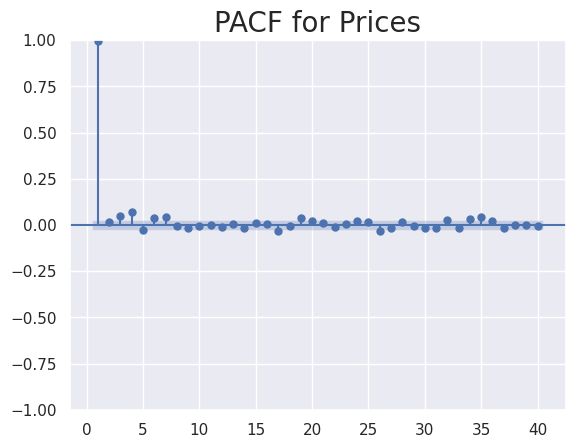

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## The AR(1) Model

In [ ]:
#model_ar = ARMA(df.market_value, order=(1,0))

In [ ]:
import statsmodels.api as sm
model_ar = sm.tsa.arima.ARIMA(df.market_value, order=(1,1,2))

In [ ]:
results_ar = model_ar.fit()

In [ ]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -27600.408
Date:                Mon, 15 Jan 2024   AIC                          55208.815
Time:                        07:05:24   BIC                          55234.900
Sample:                    01-07-1994   HQIC                         55217.956
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5872      0.079      7.436      0.000       0.432       0.742
ma.L1         -0.6115      0.078     -7.826      0.000      -0.765      -0.458
ma.L2         -0.0457      0.012     -3.944      0.000      -0.068      -0.023
sigma2      3492.2448     40.727     85.748      0.000    3412.422    3572.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3317.85
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models

In [ ]:
model_ar_2 = ARIMA(df.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

ValueError: `order` argument must be an iterable with three elements.

In [ ]:
model_ar_3 = ARMA(df.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

In [ ]:
model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

## LLR Test

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [ ]:
LLR_test(model_ar_2, model_ar_3)

In [ ]:
LLR_test(model_ar_3, model_ar_4)

In [ ]:
model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

In [ ]:
model_ar_5 = ARMA(df.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

In [ ]:
model_ar_6 = ARMA(df.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

In [ ]:
model_ar_7 = ARMA(df.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

In [ ]:
model_ar_8 = ARMA(df.market_value, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

In [ ]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

## Analysing the Residuals

In [ ]:
df['res_price'] = results_ar_7.resid

In [ ]:
df.res_price.mean()

In [ ]:
df.res_price.var()

In [ ]:
sts.adfuller(df.res_price)

In [ ]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

In [ ]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()